In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)

import warnings
warnings.filterwarnings("ignore")

### 1. Загрузка данных и первичный анализ

In [2]:
df = pd.read_csv("S05-hw-dataset.csv")

In [3]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [5]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [6]:
df["default"].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Результаты первичного анализа:
- Датасет содержит 15 признаков (не считая `client_id` и целевую переменную (таргет) `default`).
- Отсутствующих значений в датасете нет.
- Явных аномалий не выявлено.
- Таргет распределён более-менее сбалансированно, однако имеется небольшой перекос в сторону `default`=0.

### 2. Подготовка признаков и таргета

In [7]:
X = df.drop(["client_id", "default"], axis=1).to_numpy()
y = df["default"].to_numpy()

### 3. Train/Test-сплит и бейзлайн-модель

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
baseline = DummyClassifier(strategy="most_frequent", random_state=42)
baseline.fit(X_train, y_train)

,"strategy strategy: {""most_frequent"", ""prior"", ""stratified"", ""uniform"", ""constant""}, default=""prior""Strategy to use to generate predictions.* ""most_frequent"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit`. The `predict_proba` method returns the matching one-hot encoded vector.* ""prior"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit` (like ""most_frequent""). ``predict_proba`` always returns the empirical class distribution of `y` also known as the empirical class prior distribution.* ""stratified"": the `predict_proba` method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The `predict` method returns the class label which got probability one in the one-hot vector of `predict_proba`. Each sampled row of both methods is therefore independent and identically distributed.* ""uniform"": generates predictions uniformly at random from the list of unique classes observed in `y`, i.e. each class has equal probability.* ""constant"": always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class. .. versionchanged:: 0.24 The default value of `strategy` has changed to ""prior"" in version 0.24.",'most_frequent'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness to generate the predictions when``strategy='stratified'`` or ``strategy='uniform'``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"constant constant: int or str or array-like of shape (n_outputs,), default=NoneThe explicit constant as predicted by the ""constant"" strategy. Thisparameter is useful only for the ""constant"" strategy.",None


In [10]:
y_pred_baseline = baseline.predict(X_test)
y_pred_proba_baseline = baseline.predict_proba(X_test)[:, 1]

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("ROC-AUC :", roc_auc_score(y_test, y_pred_proba_baseline))

Accuracy: 0.59
ROC-AUC : 0.5


Бейзлайн задаёт нижнюю планку качества, от которой можно отталкиваться при обучении моделей, стремясь её превзойти.

### 4. Логистическая регрессия и подбор гиперпараметров

In [12]:
log_reg_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "logreg",
            LogisticRegression(
                solver="liblinear",
                max_iter=1000,
                random_state=42,
            ),
        ),
    ]
)

In [13]:
param_grid = {
    "logreg__penalty": ['l1', 'l2'],
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="roc_auc",    # можно поменять на f1, recall и т.д.
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params: {'logreg__C': 0.1, 'logreg__penalty': 'l1'}
Best ROC-AUC: 0.8609495793797421


In [14]:
best_model = grid_search.best_estimator_

In [15]:
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

In [16]:
print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred_proba_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall   :", recall_score(y_test, y_pred_best))
print("F1-Score :", f1_score(y_test, y_pred_best))

Accuracy : 0.8016666666666666
ROC-AUC  : 0.8766478342749529
Precision: 0.7981220657276995
Recall   : 0.6910569105691057
F1-Score : 0.7407407407407407


In [17]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       354
           1       0.80      0.69      0.74       246

    accuracy                           0.80       600
   macro avg       0.80      0.78      0.79       600
weighted avg       0.80      0.80      0.80       600



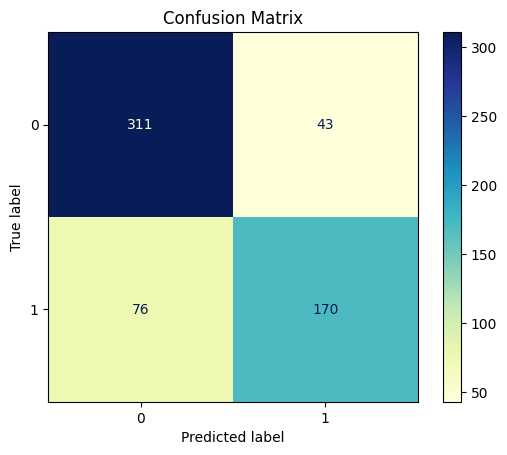

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.savefig("figures/confusion_matrix.png")
plt.show()

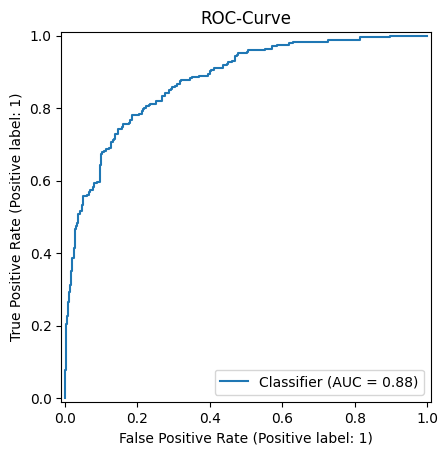

In [19]:
RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba_best,
)
plt.title("ROC-Curve")
plt.savefig("figures/roc_curve.png")
plt.show()

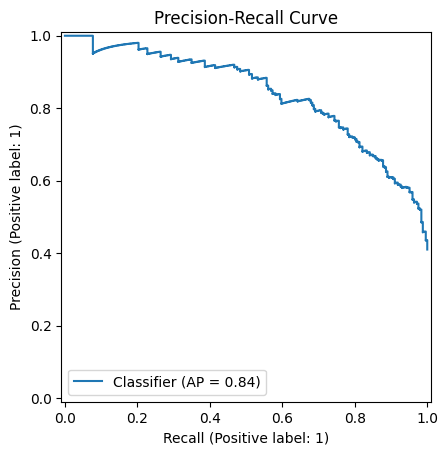

In [20]:
PrecisionRecallDisplay.from_predictions(
    y_test,
    y_pred_proba_best,
)
plt.title("Precision-Recall Curve")
plt.savefig("figures/precision_recall_curve.png")
plt.show()

### 5. Сравнение бейзлайна и логистической регрессии, текстовые выводы

In [21]:
results = {
    "Accuracy": [
        round(accuracy_score(y_test, y_pred_baseline), 2),
        round(accuracy_score(y_test, y_pred_best), 2),
    ],
    "ROC-AUC": [
        round(roc_auc_score(y_test, y_pred_proba_baseline), 2),
        round(roc_auc_score(y_test, y_pred_proba_best), 2),
    ],
    "Precision": [
        round(precision_score(y_test, y_pred_baseline), 2),
        round(precision_score(y_test, y_pred_best), 2),
    ],
    "Recall": [
        round(recall_score(y_test, y_pred_baseline), 2),
        round(recall_score(y_test, y_pred_best), 2),
    ],
    "F1-Score": [
        round(f1_score(y_test, y_pred_baseline), 2),
        round(f1_score(y_test, y_pred_best), 2),
    ],
}

models = ["DummyClassifier", "LogisticRegression"]

df_results = pd.DataFrame(results, index=models)
df_results.to_csv("artifacts/model_results.csv")
df_results

,Accuracy,ROC-AUC,Precision,Recall,F1-Score
DummyClassifier,0.59,0.50,0.0,0.00,0.00
LogisticRegression,0.80,0.88,0.8,0.69,0.74


Выводы:
- Как видно из таблицы сравнения результатов `DummyClassifier` и `LogisticRegression`, бейзлайн ожидаемо показывает качество хуже, чем логистическая регрессия.
- Метрика `accuracy` выросла на 21%, значение `ROC-AUC` выросло на 38%.
- Для логистической регрессии лучшими параметрами оказались `C`=0.1 и `logreg__penalty`="l1".
- Для данной задачи бинарной классификации модель логистической регрессии кажется вполне разумным решением.